## Stock Price Prediction and Forecasting Using Stacked LSTM - Deep Learning

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import yfinance as yf
import keras

import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Loading the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)
#ccl.head()

[*********************100%***********************]  1 of 1 completed


In [3]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Loading the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)
#dal.head()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Loading the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)
#etsy.head()

[*********************100%***********************]  1 of 1 completed


In [5]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Loading the stocks data
pp = yf.download("PYPL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
pp.dropna(inplace=True)
#PP.head()

[*********************100%***********************]  1 of 1 completed


In [6]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Loading the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)
#spy.head()

[*********************100%***********************]  1 of 1 completed


In [7]:
#Slicing SPY to precovid times and creating a new dataframe
precovid_spy = spy['2016-01-01' :'2020-02-20']
precovid_spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,335.859985,338.119995,335.559998,337.059998,330.880859,54501900
2020-02-14,337.510010,337.730011,336.200012,337.600006,331.410980,64582200
2020-02-18,336.510010,337.670013,335.209991,336.730011,330.556915,57226200
2020-02-19,337.790009,339.079987,337.480011,338.339996,332.137360,48814700
2020-02-20,337.739990,338.640015,333.679993,336.950012,330.772919,74163400


Text(0, 0.5, 'SPY Close price in $')

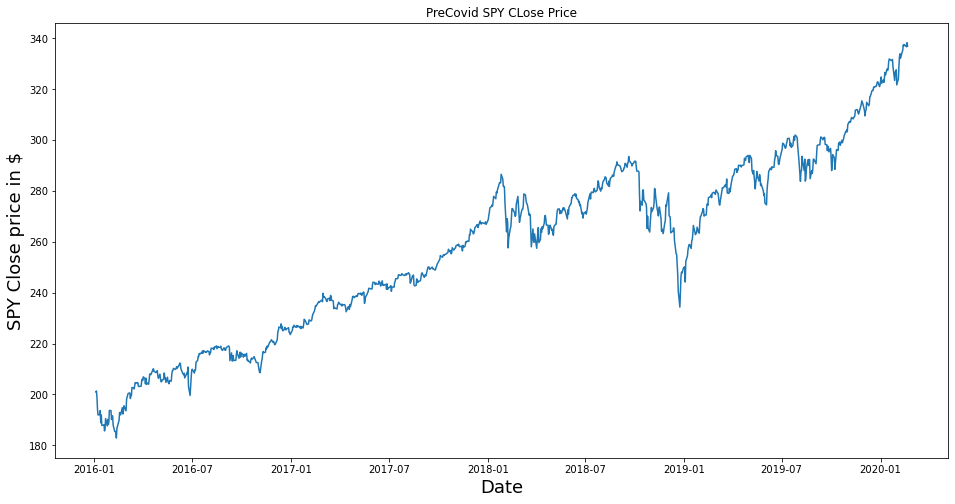

In [8]:
#Plotting the historical close prices
plt.figure(figsize=(16,8))
plt.title("PreCovid SPY CLose Price")
plt.plot(precovid_spy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [9]:
#Creating a new dataframe with only the closing price
data = precovid_spy.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

1040

In [10]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [11]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11679962],
       [0.11898637],
       [0.1026499 ],
       ...,
       [0.98964506],
       [1.        ],
       [0.99106005]])

In [12]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset 
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.11679962, 0.11898637, 0.1026499 , 0.07197069, 0.05827115,
       0.05949318, 0.06946233, 0.03839723, 0.05833543, 0.03183687,
       0.0334448 , 0.01794439, 0.02463341, 0.04926681, 0.0307435 ,
       0.04720862, 0.03389506, 0.0401981 , 0.06984822, 0.06939795,
       0.0469514 , 0.05428353, 0.05621305, 0.03273731, 0.01646512,
       0.01652941, 0.01550041, 0.        , 0.02424752, 0.04450732,
       0.06444562, 0.05936452, 0.05878569, 0.0766658 , 0.06084388,
       0.06650371, 0.08155385, 0.07865961, 0.06881912, 0.09808336,
       0.10380756, 0.10882428, 0.11300484, 0.11403394, 0.09994851,
       0.10625164, 0.10728064, 0.1279907 , 0.1263185 , 0.12419603,
       0.1317211 , 0.14001804, 0.13841012, 0.14027526, 0.13956777,
       0.13088504, 0.13030612, 0.13107799, 0.14316951, 0.14895809])]
[0.14574224520701984]
[array([0.11679962, 0.11898637, 0.1026499 , 0.07197069, 0.05827115,
       0.05949318, 0.06946233, 0.03839723, 0.05833543, 0.03183687,
       0.0334448 , 0.01794439, 0.024

In [13]:
#converting y_train to a numpy array
y_train = np.asarray(y_train)

In [14]:
#converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model


In [15]:
#Building the LSTM model using sequential
model=Sequential()
#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output layer
model.add(Dense(1))

In [16]:
# Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 16s 282ms/step - loss: 0.0137
Epoch 2/10
11/11 [==============================] - 3s 271ms/step - loss: 0.0055
Epoch 3/10
11/11 [==============================] - 3s 304ms/step - loss: 0.0156
Epoch 4/10
11/11 [==============================] - 3s 317ms/step - loss: 0.0019
Epoch 5/10
11/11 [==============================] - 4s 319ms/step - loss: 0.0012
Epoch 6/10
11/11 [==============================] - 3s 291ms/step - loss: 5.6835e-04
Epoch 7/10
11/11 [==============================] - 3s 290ms/step - loss: 5.9274e-04
Epoch 8/10
11/11 [==============================] - 3s 287ms/step - loss: 7.4207e-04
Epoch 9/10
11/11 [==============================] - 3s 278ms/step - loss: 0.0011
Epoch 10/10
11/11 [==============================] - 4s 340ms/step - loss: 7.8207e-04


In [19]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [20]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [21]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [22]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [23]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.8734600360576923

<function matplotlib.pyplot.show(close=None, block=None)>

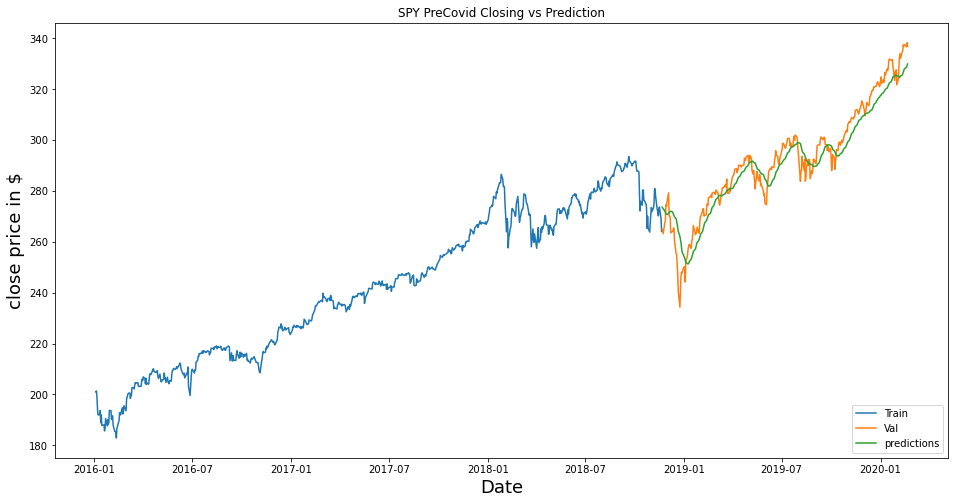

In [24]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('SPY PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [25]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2018-11-21,265.019989,273.673248
2018-11-23,263.250000,273.017853
2018-11-26,267.500000,272.224823
2018-11-27,268.399994,271.548981
2018-11-28,274.579987,271.004059
...,...,...
2020-02-13,337.059998,327.303894
2020-02-14,337.600006,327.991333
2020-02-18,336.730011,328.686615


In [26]:
#slicing ccl_df to precovid times and creating a new dataframe
precovid_ccl = ccl['2016-01-01' :'2020-02-20']
precovid_ccl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,43.259998,43.599998,42.759998,43.200001,42.701618,6670600
2020-02-14,43.070000,43.119999,42.500000,42.599998,42.108536,3998000
2020-02-18,42.599998,42.970001,42.529999,42.919998,42.424847,6245300
2020-02-19,42.560001,43.439999,42.529999,43.340000,42.840000,4625400
2020-02-20,42.619999,42.860001,42.189999,42.500000,42.500000,5343800


Text(0, 0.5, 'CCL Close price in $')

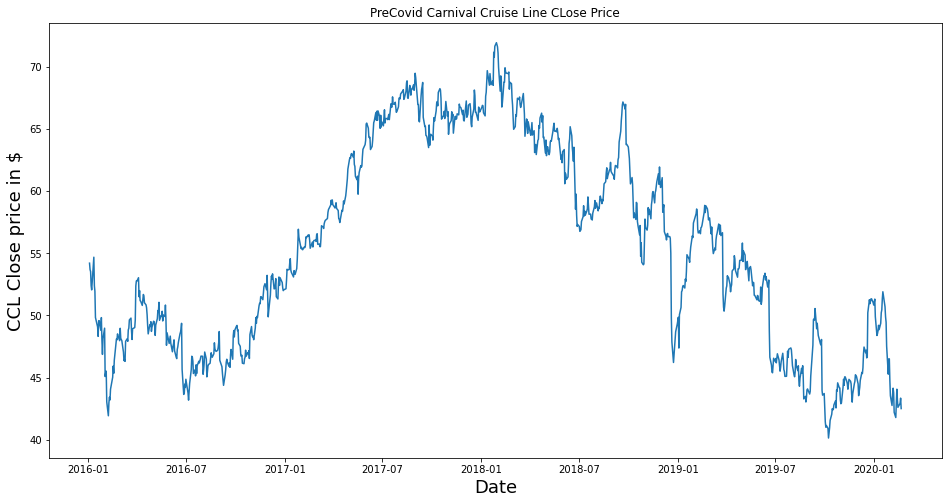

In [27]:
#Plotting CCL historical close prices
plt.figure(figsize=(16,8))
plt.title("PreCovid Carnival Cruise Line CLose Price")
plt.plot(precovid_ccl["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [28]:
#Creating a new dataframe with only the closing price
data = precovid_ccl.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [29]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [30]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.44231371],
       [0.42596663],
       [0.42093677],
       ...,
       [0.08770817],
       [0.10091163],
       [0.07450484]])

In [31]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.44231371, 0.42596663, 0.42093677, 0.38541332, 0.37472486,
       0.43414011, 0.45740329, 0.38509901, 0.3712668 , 0.30493557,
       0.28104364, 0.25715184, 0.29676197, 0.29676197, 0.27255573,
       0.30462113, 0.24897824, 0.21156867, 0.25149323, 0.27790002,
       0.15561146, 0.16535675, 0.16912911, 0.09148066, 0.05627152,
       0.0892801 , 0.10311219, 0.09619608, 0.12354606, 0.15372522,
       0.18201813, 0.16378494, 0.1967934 , 0.23891852, 0.25055005,
       0.24834949, 0.26343907, 0.2580949 , 0.24614894, 0.27758559,
       0.25243629, 0.24897824, 0.24646337, 0.21754159, 0.19585034,
       0.19930839, 0.1939641 , 0.24457713, 0.2511788 , 0.24457713,
       0.27349891, 0.27790002, 0.29864821, 0.30336364, 0.27098392,
       0.24929267, 0.2763281 , 0.27947183, 0.29896252, 0.38478458])]
[0.3973592846261711]
[array([0.44231371, 0.42596663, 0.42093677, 0.38541332, 0.37472486,
       0.43414011, 0.45740329, 0.38509901, 0.3712668 , 0.30493557,
       0.28104364, 0.25715184, 0.2967

In [32]:
#Converting y_train to a numpy array
y_train = np.asarray(y_train)

In [33]:
#Converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [34]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output layer
model.add(Dense(1))

In [35]:
#Summarizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 16s 279ms/step - loss: 0.0264
Epoch 2/10
11/11 [==============================] - 3s 269ms/step - loss: 0.0154
Epoch 3/10
11/11 [==============================] - 3s 288ms/step - loss: 0.0243
Epoch 4/10
11/11 [==============================] - 3s 282ms/step - loss: 0.0070
Epoch 5/10
11/11 [==============================] - 3s 282ms/step - loss: 0.0075
Epoch 6/10
11/11 [==============================] - 3s 293ms/step - loss: 0.0037
Epoch 7/10
11/11 [==============================] - 3s 276ms/step - loss: 0.0030
Epoch 8/10
11/11 [==============================] - 3s 275ms/step - loss: 0.0026
Epoch 9/10
11/11 [==============================] - 3s 248ms/step - loss: 0.0025
Epoch 10/10
11/11 [==============================] - 3s 244ms/step - loss: 0.0024


In [38]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [39]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [40]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [41]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [42]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.8242669227795724

<function matplotlib.pyplot.show(close=None, block=None)>

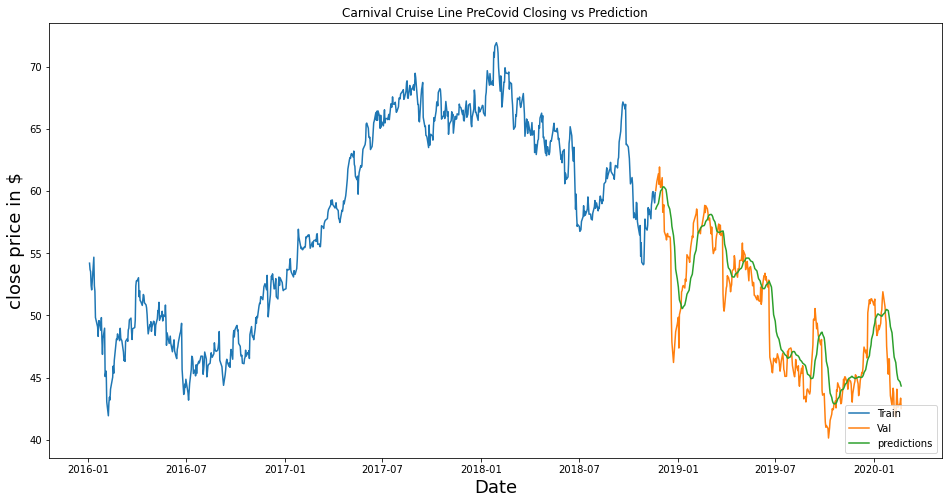

In [43]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Carnival Cruise Line PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [44]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2018-11-21,60.040001,58.556412
2018-11-23,60.750000,58.773586
2018-11-26,61.400002,59.010544
2018-11-27,60.549999,59.277573
2018-11-28,61.939999,59.513126
...,...,...
2020-02-13,43.200001,45.089294
2020-02-14,42.599998,44.855564
2020-02-18,42.919998,44.638226


In [45]:
#Slicing dal_df to precovid times and creating a new dataframe.
precovid_dal = dal['2016-01-01' :'2020-02-20']
precovid_dal.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,58.750000,59.209999,58.349998,59.130001,58.724190,4353100
2020-02-14,59.240002,59.470001,58.580002,58.900002,58.495766,3810100
2020-02-18,58.869999,59.470001,58.410000,58.720001,58.317001,5690600
2020-02-19,58.490002,58.580002,58.029999,58.509998,58.509998,4399900
2020-02-20,58.200001,58.990002,58.119999,58.380001,58.380001,5239400


Text(0, 0.5, 'CCL Close price in $')

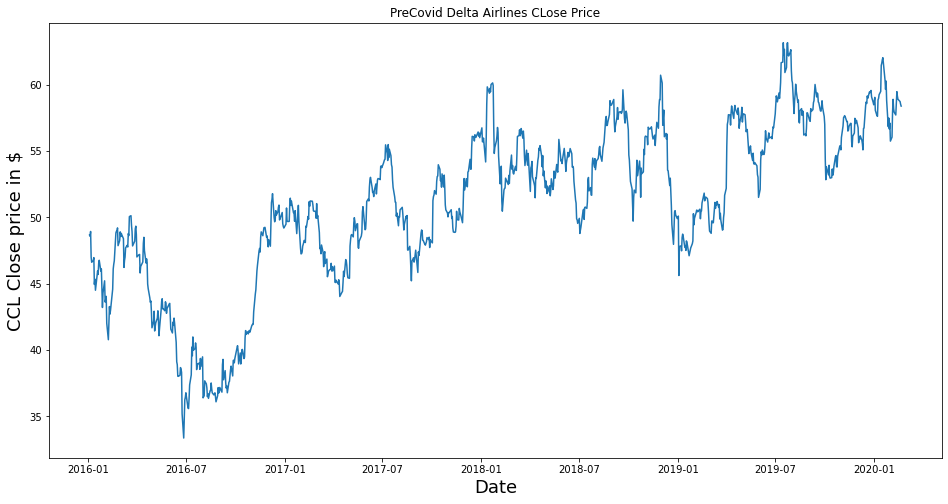

In [46]:
#Plotting the dal historical close prices
plt.figure(figsize=(16,8))
plt.title("PreCovid Delta Airlines CLose Price")
plt.plot(precovid_dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [47]:
#Creating a new dataframe with only the closing price
data = precovid_dal.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

1040

In [48]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [49]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.51342281],
       [0.51040267],
       [0.52248322],
       ...,
       [0.85100675],
       [0.84395968],
       [0.83959735]])

In [50]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.51342281, 0.51040267, 0.52248322, 0.45771811, 0.44463088,
       0.44899334, 0.4563758 , 0.38859055, 0.40201342, 0.37382549,
       0.42281875, 0.41375833, 0.44161074, 0.44966436, 0.4221476 ,
       0.42785236, 0.38120808, 0.33020136, 0.36677854, 0.39765097,
       0.34395974, 0.35033553, 0.35838928, 0.29026839, 0.24865772,
       0.28926172, 0.33255034, 0.31342283, 0.32315441, 0.37651012,
       0.42751672, 0.43959728, 0.44832218, 0.51879193, 0.52315438,
       0.52281874, 0.53154364, 0.48657719, 0.49932891, 0.52147655,
       0.50973151, 0.51778526, 0.51375832, 0.50436239, 0.43154366,
       0.44899334, 0.45771811, 0.48087243, 0.48758386, 0.48322141,
       0.5171141 , 0.51208049, 0.56006708, 0.56241607, 0.53791944,
       0.52181207, 0.48590604, 0.4979866 , 0.52919466, 0.53590609])]
[0.5140939626525767]
[array([0.51342281, 0.51040267, 0.52248322, 0.45771811, 0.44463088,
       0.44899334, 0.4563758 , 0.38859055, 0.40201342, 0.37382549,
       0.42281875, 0.41375833, 0.4416

In [51]:
#Converting y_train to a numpy array
y_train = np.asarray(y_train)

In [52]:
#Converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [53]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output layer
model.add(Dense(1))

In [54]:
#Summarizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 18s 271ms/step - loss: 0.0625
Epoch 2/10
11/11 [==============================] - 3s 272ms/step - loss: 0.0200
Epoch 3/10
11/11 [==============================] - 3s 268ms/step - loss: 0.0146
Epoch 4/10
11/11 [==============================] - 3s 268ms/step - loss: 0.0114
Epoch 5/10
11/11 [==============================] - 3s 275ms/step - loss: 0.0109
Epoch 6/10
11/11 [==============================] - 3s 269ms/step - loss: 0.0068
Epoch 7/10
11/11 [==============================] - 3s 248ms/step - loss: 0.0073
Epoch 8/10
11/11 [==============================] - 3s 236ms/step - loss: 0.0040
Epoch 9/10
11/11 [==============================] - 3s 227ms/step - loss: 0.0043
Epoch 10/10
11/11 [==============================] - 3s 228ms/step - loss: 0.0035


In [57]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [58]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [59]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [60]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [61]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.16066910670353815

<function matplotlib.pyplot.show(close=None, block=None)>

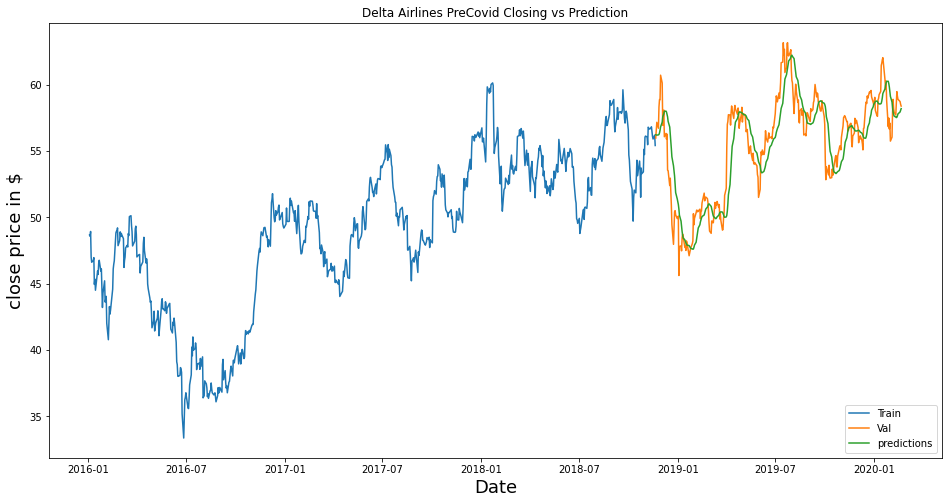

In [62]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Delta Airlines PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [63]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2018-11-21,55.970001,56.222668
2018-11-23,57.160000,56.191467
2018-11-26,56.709999,56.210354
2018-11-27,58.310001,56.240444
2018-11-28,58.869999,56.358418
...,...,...
2020-02-13,59.130001,57.646030
2020-02-14,58.900002,57.789108
2020-02-18,58.720001,57.939194


In [64]:
#Slicing etsy_df to precovid times and creating a new dataframe.
precovid_etsy = etsy['2016-01-01' :'2020-02-20']
precovid_etsy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,51.790001,53.139999,51.500000,52.970001,52.970001,2131900
2020-02-14,53.389999,53.540001,52.200001,53.160000,53.160000,2065900
2020-02-18,53.020000,53.799999,52.650002,53.320000,53.320000,1819500
2020-02-19,53.790001,54.250000,52.900002,53.180000,53.180000,2700500
2020-02-20,53.369999,55.474998,53.180000,54.389999,54.389999,3451000


Text(0, 0.5, 'CCL Close price in $')

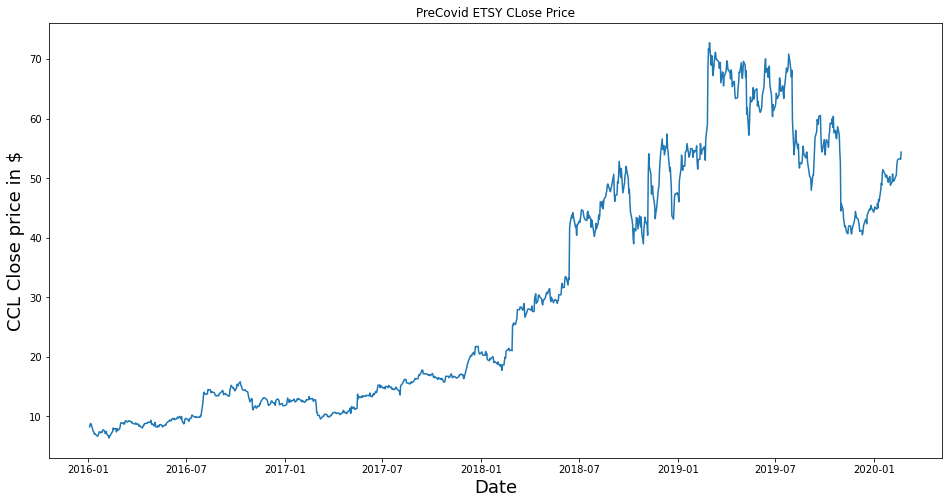

In [65]:
#Plotting ETSY historical close prices
plt.figure(figsize=(16,8))
plt.title("PreCovid ETSY CLose Price")
plt.plot(precovid_etsy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [66]:
#Creating a new dataframe with only the closing price
data = precovid_etsy.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

1040

In [67]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [68]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02830899],
       [0.03237465],
       [0.03674146],
       ...,
       [0.70712245],
       [0.70501434],
       [0.72323448]])

In [69]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.02830899, 0.03237465, 0.03674146, 0.03478392, 0.03041711,
       0.01626261, 0.01490739, 0.00948652, 0.01069116, 0.0096371 ,
       0.00436681, 0.00783015, 0.00948652, 0.01596145, 0.01340159,
       0.01535913, 0.0141545 , 0.01701551, 0.02108117, 0.01791899,
       0.01144406, 0.01445566, 0.01686493, 0.01008884, 0.00542087,
       0.        , 0.00542087, 0.00557145, 0.00813131, 0.01701551,
       0.02529739, 0.02168348, 0.02364101, 0.02394217, 0.01550971,
       0.02318928, 0.02318928, 0.01942479, 0.0237916 , 0.03011594,
       0.03854841, 0.03809668, 0.03704261, 0.03884956, 0.0349345 ,
       0.03583797, 0.04065653, 0.04381871, 0.04050595, 0.04231291,
       0.04216232, 0.04381871, 0.04321638, 0.04065653, 0.04201174,
       0.03779551, 0.03749436, 0.03523565, 0.03598856, 0.03839783])]
[0.03523565424994657]
[array([0.02830899, 0.03237465, 0.03674146, 0.03478392, 0.03041711,
       0.01626261, 0.01490739, 0.00948652, 0.01069116, 0.0096371 ,
       0.00436681, 0.00783015, 0.009

In [70]:
#Converting y_train to a numpy array
y_train = np.asarray(y_train)

In [71]:
#Converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [72]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output Layer
model.add(Dense(1))

In [73]:
#Summarizing the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [74]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 24s 279ms/step - loss: 0.0025
Epoch 2/10
11/11 [==============================] - 4s 326ms/step - loss: 0.0184
Epoch 3/10
11/11 [==============================] - 3s 278ms/step - loss: 0.0024
Epoch 4/10
11/11 [==============================] - 3s 235ms/step - loss: 0.0112
Epoch 5/10
11/11 [==============================] - 3s 233ms/step - loss: 0.0015
Epoch 6/10
11/11 [==============================] - 3s 287ms/step - loss: 0.0062
Epoch 7/10
11/11 [==============================] - 3s 287ms/step - loss: 6.3286e-04
Epoch 8/10
11/11 [==============================] - 3s 247ms/step - loss: 6.6384e-04
Epoch 9/10
11/11 [==============================] - 3s 237ms/step - loss: 5.4881e-04
Epoch 10/10
11/11 [==============================] - 3s 240ms/step - loss: 9.4952e-04


In [76]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [77]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [78]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [79]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [80]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.35252892665374

<function matplotlib.pyplot.show(close=None, block=None)>

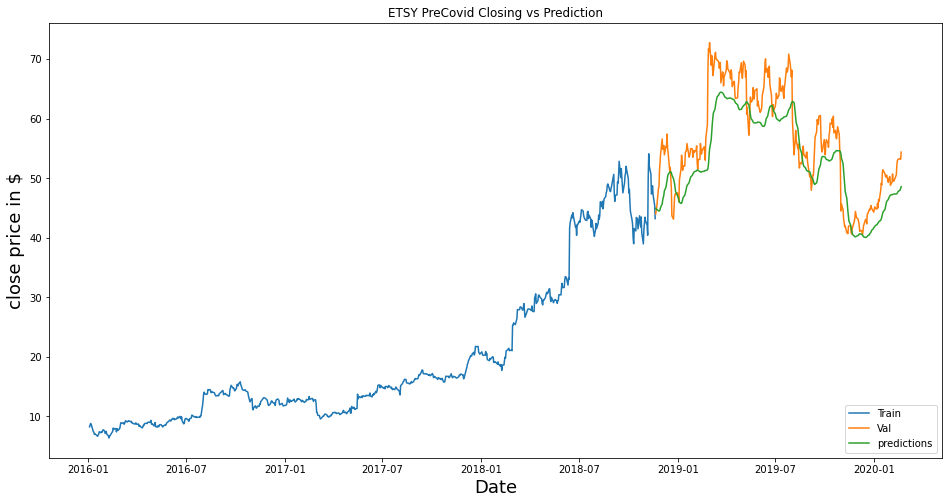

In [81]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('ETSY PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [82]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2018-11-21,44.020000,44.941738
2018-11-23,45.270000,44.753712
2018-11-26,48.230000,44.556179
2018-11-27,48.580002,44.487446
2018-11-28,51.380001,44.520554
...,...,...
2020-02-13,52.970001,47.534332
2020-02-14,53.160000,47.743008
2020-02-18,53.320000,48.002659


In [83]:
#Slicing pp_df to precovid times and creating a new dataframe.
precovid_pp = pp['2016-01-01' :'2020-02-20']
precovid_pp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,118.040001,121.099998,117.800003,120.510002,120.510002,6066300
2020-02-14,120.889999,123.000000,120.800003,122.989998,122.989998,5769900
2020-02-18,122.580002,122.989998,121.680000,122.269997,122.269997,5085700
2020-02-19,122.629997,124.449997,122.300003,123.910004,123.910004,4878600
2020-02-20,123.860001,124.309998,120.400002,122.430000,122.430000,7212900


Text(0, 0.5, 'CCL Close price in $')

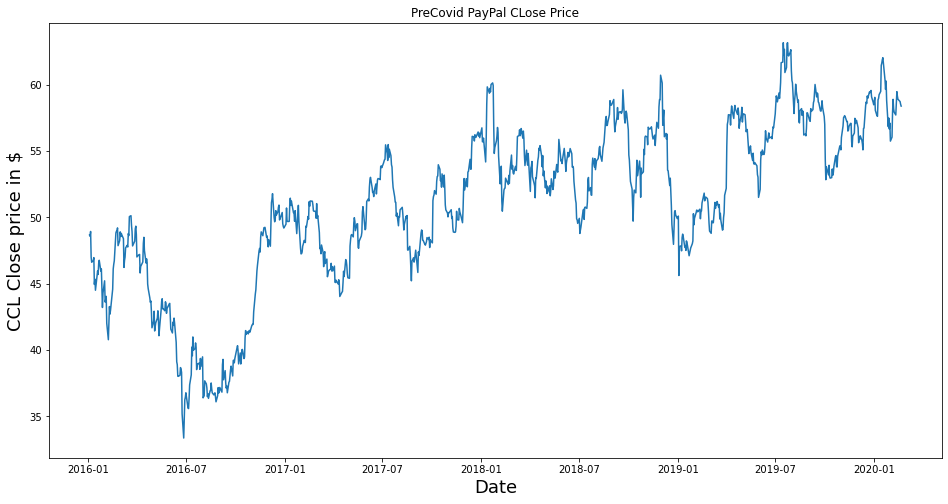

In [84]:
#Plotting PP historical close prices
plt.figure(figsize=(16,8))
plt.title("PreCovid PayPal CLose Price")
plt.plot(precovid_dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [85]:
#Creating a new dataframe with only the closing price
data = precovid_pp.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

1040

In [86]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [87]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03829144],
       [0.03354547],
       [0.02998596],
       ...,
       [0.98231036],
       [1.        ],
       [0.98403621]])

In [88]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.03829144, 0.03354547, 0.02998596, 0.02081761, 0.0160716 ,
       0.01984684, 0.0202783 , 0.0099234 , 0.01801314, 0.01197282,
       0.01078632, 0.        , 0.        , 0.0052853 , 0.00291229,
       0.00830545, 0.00420666, 0.03279043, 0.05328442, 0.06342359,
       0.06072701, 0.06266851, 0.06439432, 0.04174306, 0.02599504,
       0.01617948, 0.01833676, 0.02502427, 0.03343758, 0.04594972,
       0.05565742, 0.05511812, 0.0491856 , 0.05177434, 0.04616545,
       0.05684393, 0.05975624, 0.06784598, 0.07485706, 0.08682989,
       0.08585912, 0.08434904, 0.08456477, 0.08391758, 0.0750728 ,
       0.07949519, 0.0786323 , 0.08941862, 0.08823212, 0.08704562,
       0.09319382, 0.09416459, 0.0885557 , 0.10721603, 0.10915757,
       0.10052852, 0.08327038, 0.08132888, 0.08985005, 0.08456477])]
[0.07981876259058879]
[array([0.03829144, 0.03354547, 0.02998596, 0.02081761, 0.0160716 ,
       0.01984684, 0.0202783 , 0.0099234 , 0.01801314, 0.01197282,
       0.01078632, 0.        , 0.   

In [89]:
#Converting y_train to a numpy array
y_train = np.asarray(y_train)

In [90]:
#Converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [91]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))


#Output Layer 
model.add(Dense(1))

In [92]:
#Summarizing the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [93]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 29s 229ms/step - loss: 0.0037
Epoch 2/10
11/11 [==============================] - 3s 232ms/step - loss: 0.0224
Epoch 3/10
11/11 [==============================] - 3s 251ms/step - loss: 0.0125
Epoch 4/10
11/11 [==============================] - 3s 232ms/step - loss: 0.0051
Epoch 5/10
11/11 [==============================] - 3s 230ms/step - loss: 0.0054
Epoch 6/10
11/11 [==============================] - 3s 227ms/step - loss: 0.0062
Epoch 7/10
11/11 [==============================] - 3s 229ms/step - loss: 0.0031
Epoch 8/10
11/11 [==============================] - 3s 247ms/step - loss: 0.0031
Epoch 9/10
11/11 [==============================] - 3s 233ms/step - loss: 0.0014
Epoch 10/10
11/11 [==============================] - 3s 234ms/step - loss: 0.0012


In [95]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [96]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [97]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [98]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [99]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.561097487425193

<function matplotlib.pyplot.show(close=None, block=None)>

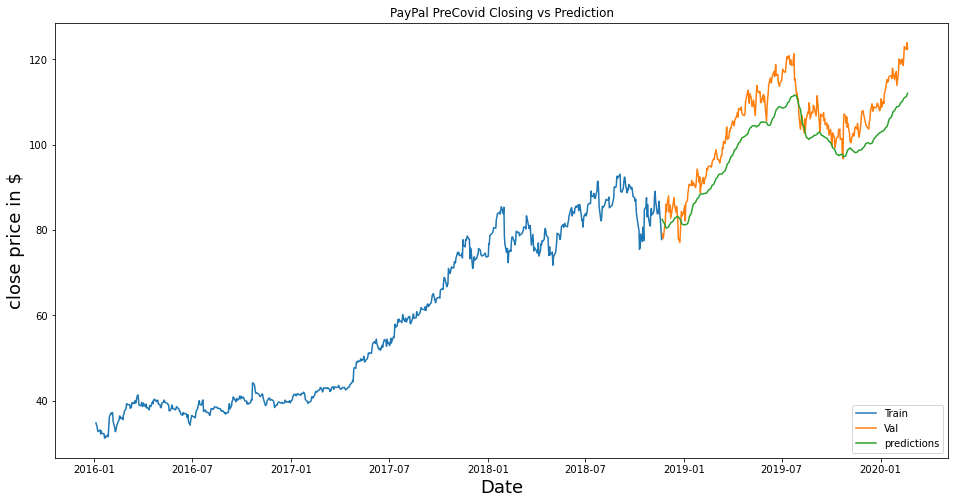

In [100]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('PayPal PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [101]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2018-11-21,79.120003,82.487549
2018-11-23,77.949997,81.963600
2018-11-26,80.860001,81.356308
2018-11-27,81.970001,80.856461
2018-11-28,85.980003,80.499519
...,...,...
2020-02-13,120.510002,110.788559
2020-02-14,122.989998,110.995972
2020-02-18,122.269997,111.314018
